In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

penguins=sns.load_dataset('penguins')
penguins=penguins.dropna(how='any', axis=0)
penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [2]:
# to set a style of graph in seaborn, use set_style().
# Style can be darkgrid, whitegrid, dark, white, ticks
# colour palette can be set to specify different colour themes
# tick size can be specified also
# context can be poster, talk or paper
sns.set_style('white')
sns.color_palette("pastel")
sns.set_context("poster", font_scale=1.5)
sns.set_style('ticks', {"xtick.major.size": 2, "ytick.major.size": 2})


## linear regression plots with seaborn
- lmplot
- regplot

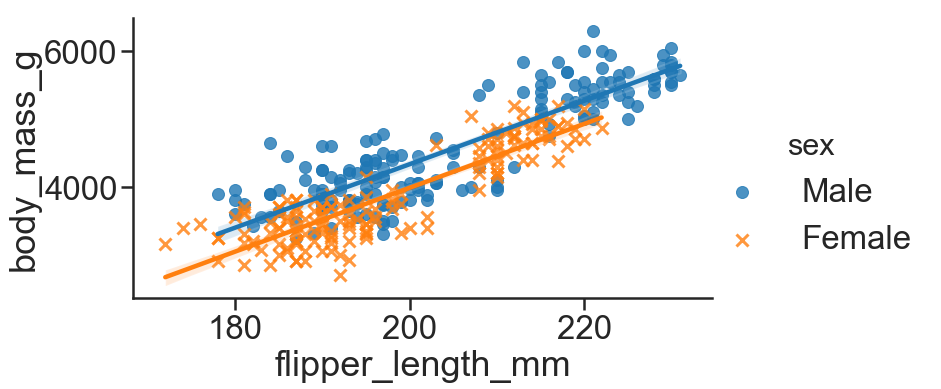

In [3]:
# default scatter plot, plotting length vs alcohol and displaying the sexes 
# regression line can be removed with fit_reg=False
# aspect 2 is used to produce a wide plot with size (height) 5.
# a 95% confidence interval is also plotted
%matplotlib inline
sns.lmplot(x='flipper_length_mm', y='body_mass_g', height= 5, aspect=2, hue='sex',
           data=penguins, markers=["o", "x"])

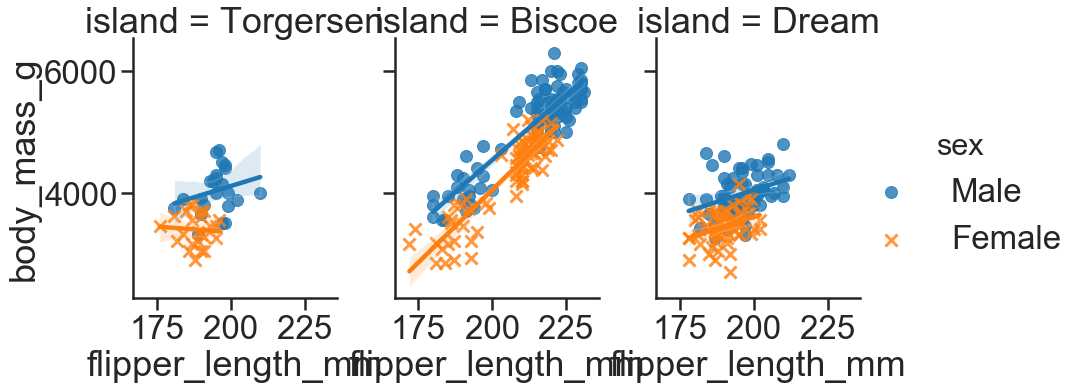

In [4]:
# we can also plot this for difference column variables, eg we want this plot for each 'island'
# this shows us that there is a much stronger relationship between flipper length and mass on the Biscoe island
sns.lmplot(x='flipper_length_mm', y='body_mass_g', height= 5, aspect=0.8, hue='sex',
           data=penguins, markers=["o", "x"], col='island')

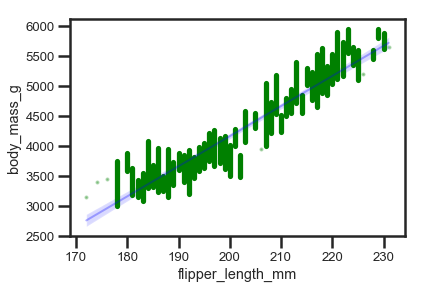

In [5]:
# regplot is similar to lmplot, where x and y is plotted, along with a regression line and 95% confidence inteval
# reglot however accepts data in different formats eg arrays, series or df.
# lmplot requires variables to be specified as a string

# the estimator can be used to plot an estimate of central tendency
# scatter kw is used to specify scatter features - s specified size of the data point
# line kw is used to specify line features -lw specifies width of a line, alpha- allows us to see overlap
sns.set_context("poster", font_scale=.6)
sns.regplot(x='flipper_length_mm', y='body_mass_g',
            fit_reg=True,
            data=penguins, 
            x_estimator=np.mean,
            dropna=True,
            scatter_kws={"color": "green", "alpha": 0.3, "s":4},
            line_kws = {"color": "blue", "alpha": 0.3, "lw":2})


## Non linear trends
lmplot() and regplot() can fit polynomial regression models to explore non linear trends. using order=2 makes this a second order polynomial.


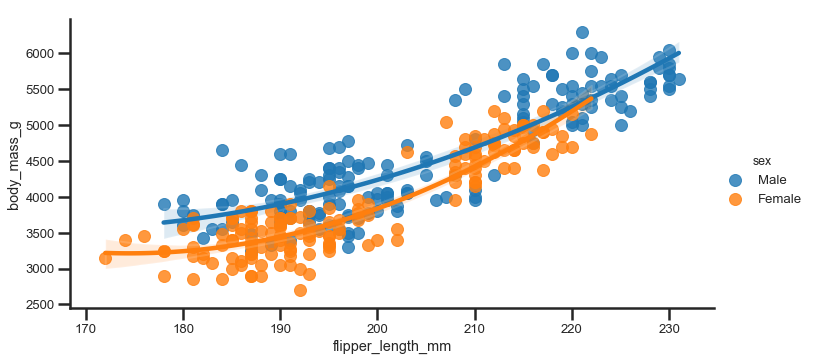

In [6]:
sns.lmplot(x='flipper_length_mm', y='body_mass_g', height= 5, aspect=2, hue='sex', 
           data=penguins, order=2, )

we can use residplot() to check if a simple regression model is suitable for the dataset. it fits and removes a simple linear regression and then plots the residual values. The values should be scattered arounf y=0.
If there is a pattern around the line y=0, ie structure in the data, then the linear regression model is not appropriate.
Here, all datapoints are scattered randomly, so we can say the model is appropriate.

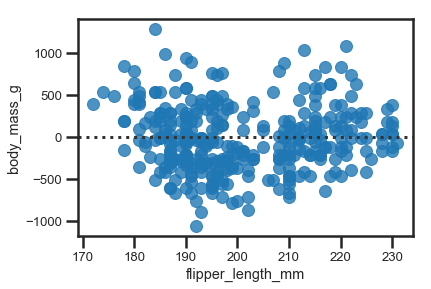

In [7]:
sns.residplot(x='flipper_length_mm', y='body_mass_g', data=penguins)

## Subplots in seaborn

In [8]:
from sklearn import linear_model
#firstly determining the line of best fit through the data with the linear regression model

ols = linear_model.LinearRegression()
x= penguins['flipper_length_mm'].values.reshape(-1, 1)
y=penguins['body_mass_g'].values.reshape(-1, 1)
model=ols.fit(x, y)
coeff=model.coef_
interc=model.intercept_

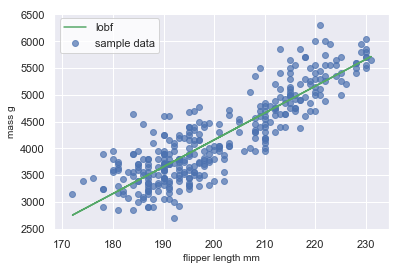

In [9]:
%matplotlib inline
sns.set()
fig, ax = plt.subplots()

ax.plot(x, coeff*x + interc, label='lobf', color='g')

ax.scatter(penguins['flipper_length_mm'],penguins['body_mass_g'], label= 'sample data', alpha=0.7)
ax.set_ylabel('mass g', fontsize=10)
ax.set_xlabel('flipper length mm', fontsize=10)
ax.legend(facecolor='white', fontsize=11)